**This is a classification problem where task is to classify Iris flower into one of the three species: Setosa, Versicolor or Virginica based on four independent variables which are Sepal Length, Sepal Width, Petal Length and Petal Width.**

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') 

# Importing the Dataset

In [3]:
df=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [4]:
#Dimension of dataset
df.ndim

2

In [5]:
#Shape of dataset
df.shape

(150, 5)

In [6]:
#Size of dataset
df.size

750

In [7]:
#Info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Statistical info of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Check to understand if there are null values in the dataset. No null vlues in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#Let us check the distribution of Target variables/ Iris flower species. All three Target variables have same representation in the dataset.
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Visualization

Let us plot histograms to understand the distribution of data around all four dependent variables

[Text(0.5, 1.0, 'Sepal Length Histogram')]

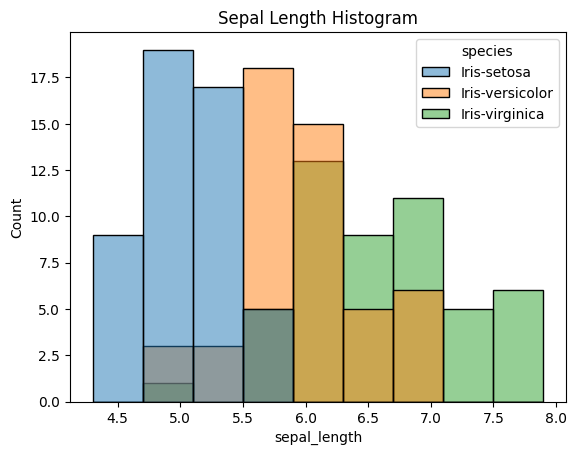

In [11]:
sns.histplot(data=df,x='sepal_length',hue='species').set(title='Sepal Length Histogram')

[Text(0.5, 1.0, 'Sepal Width Histogram')]

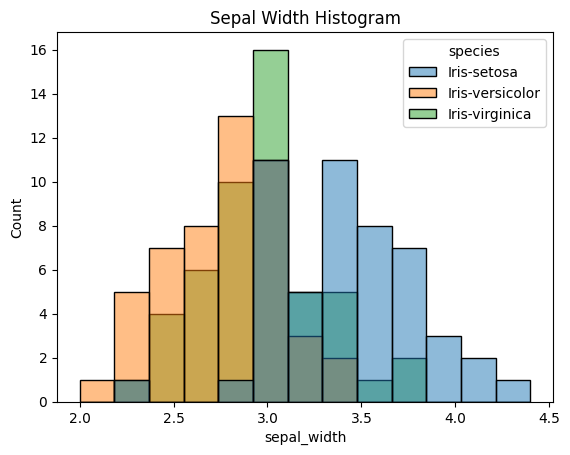

In [12]:
sns.histplot(data=df,x='sepal_width',hue='species').set(title='Sepal Width Histogram')

[Text(0.5, 1.0, 'Petal Length Histogram')]

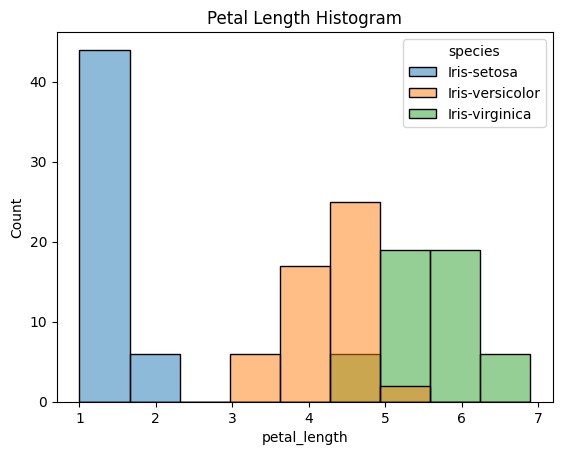

In [13]:
sns.histplot(data=df,x='petal_length',hue='species').set(title='Petal Length Histogram')

[Text(0.5, 1.0, 'Petal Width Histogram')]

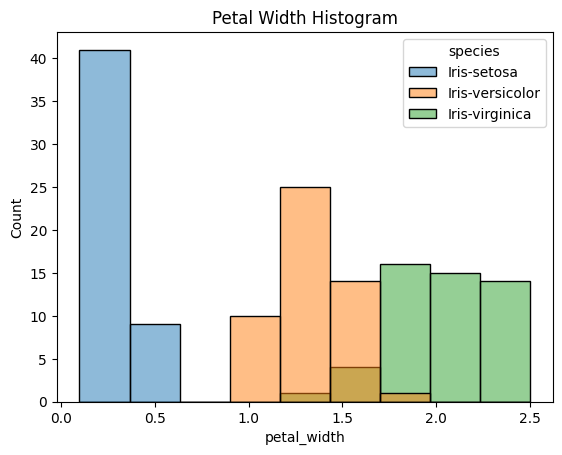

In [14]:
sns.histplot(data=df,x='petal_width',hue='species').set(title='Petal Width Histogram')

# Outlier Detection

Let us plot box plots to understand if there are outliers

In [15]:
fig = px.box(data_frame=df, y='sepal_length',title='Outlier Detection for Sepal Length')
fig.show()

fig = px.box(data_frame=df, y='sepal_width',title='Outlier Detection for Sepal Width')
fig.show()

fig = px.box(data_frame=df, y='petal_length',title='Outlier Detection for Petal Length')
fig.show()

fig = px.box(data_frame=df, y='petal_width',title='Outlier Detection for Petal Width')
fig.show()

It is evident from all the above graphs that there are outliers in sepal width. Let us try to find them through the code.

In [16]:
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)
IQR=Q3-Q1
print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
Lower_Bound=Q1-1.5*IQR
Upper_Bound=Q3+1.5*IQR
print("Lower_Bound: ",Lower_Bound)
print("Upper_Bound: ",Upper_Bound)
l1=[]
for i in df['sepal_width']:
    if i<Lower_Bound:
        l1.append(i)
l2=[]
for i in df['sepal_width']:
    if i>Upper_Bound:
        l2.append(i)
outliers_list=l1+l2
outliers_list.sort()

# print("List of Outliers in Sepal Width: ",outliers_list)

Q1:  2.8
Q3:  3.3
IQR:  0.5
Lower_Bound:  2.05
Upper_Bound:  4.05


Though there are outliers in the dataset, I have not treated outliers. Presence of outliers haven't affected the accuracy of the model as seen in the results below.

# Feature Selection

In [17]:
x=df.drop("species",axis=1)
y=df["species"]

# Train & Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

# Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred_lr=lr.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [23]:
print(classification_report(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

0.9777777777777777
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


# K Nearest Neighbours Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn=knn.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

1.0
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [29]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred_rf=rf.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

0.9777777777777777
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [33]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt=dt.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

0.9555555555555556
[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]


# Conclusion

* There are outliers in the dataset in Sepal Width however that does not affect the accuracy of the model
* Modeling is done using different algorithms: Logistic Regression, K Nearest Neighbours Classifier, Random Forest and Decision Tree. All the algorithms have produced the possibly best results in terms of accuracy